In [129]:
#importing necessary libraries
import pandas as pd
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from joblib import dump
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [2]:
client = MongoClient('mongodb://localhost:27017/')

In [3]:
db = client['Heart_Disease']
collection = db['raw_data']

In [5]:
cursor = collection.find({})

In [7]:
df = pd.DataFrame(list(cursor))

,_id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,660aff36420affcf26ef9d32,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,660aff36420affcf26ef9d33,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,660aff36420affcf26ef9d34,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,660aff36420affcf26ef9d35,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,660aff36420affcf26ef9d36,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [18]:
df.drop(columns='_id',inplace=True)

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [23]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


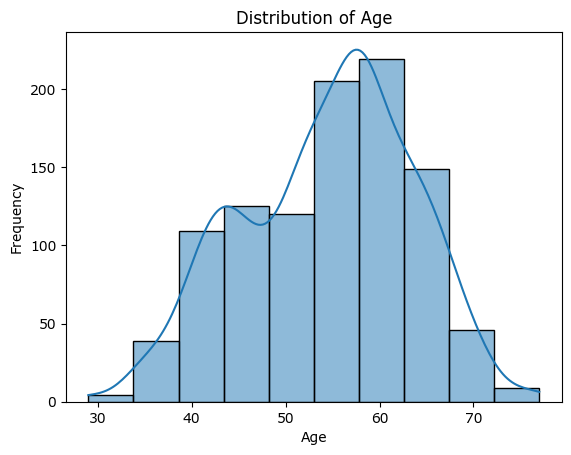

In [40]:
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

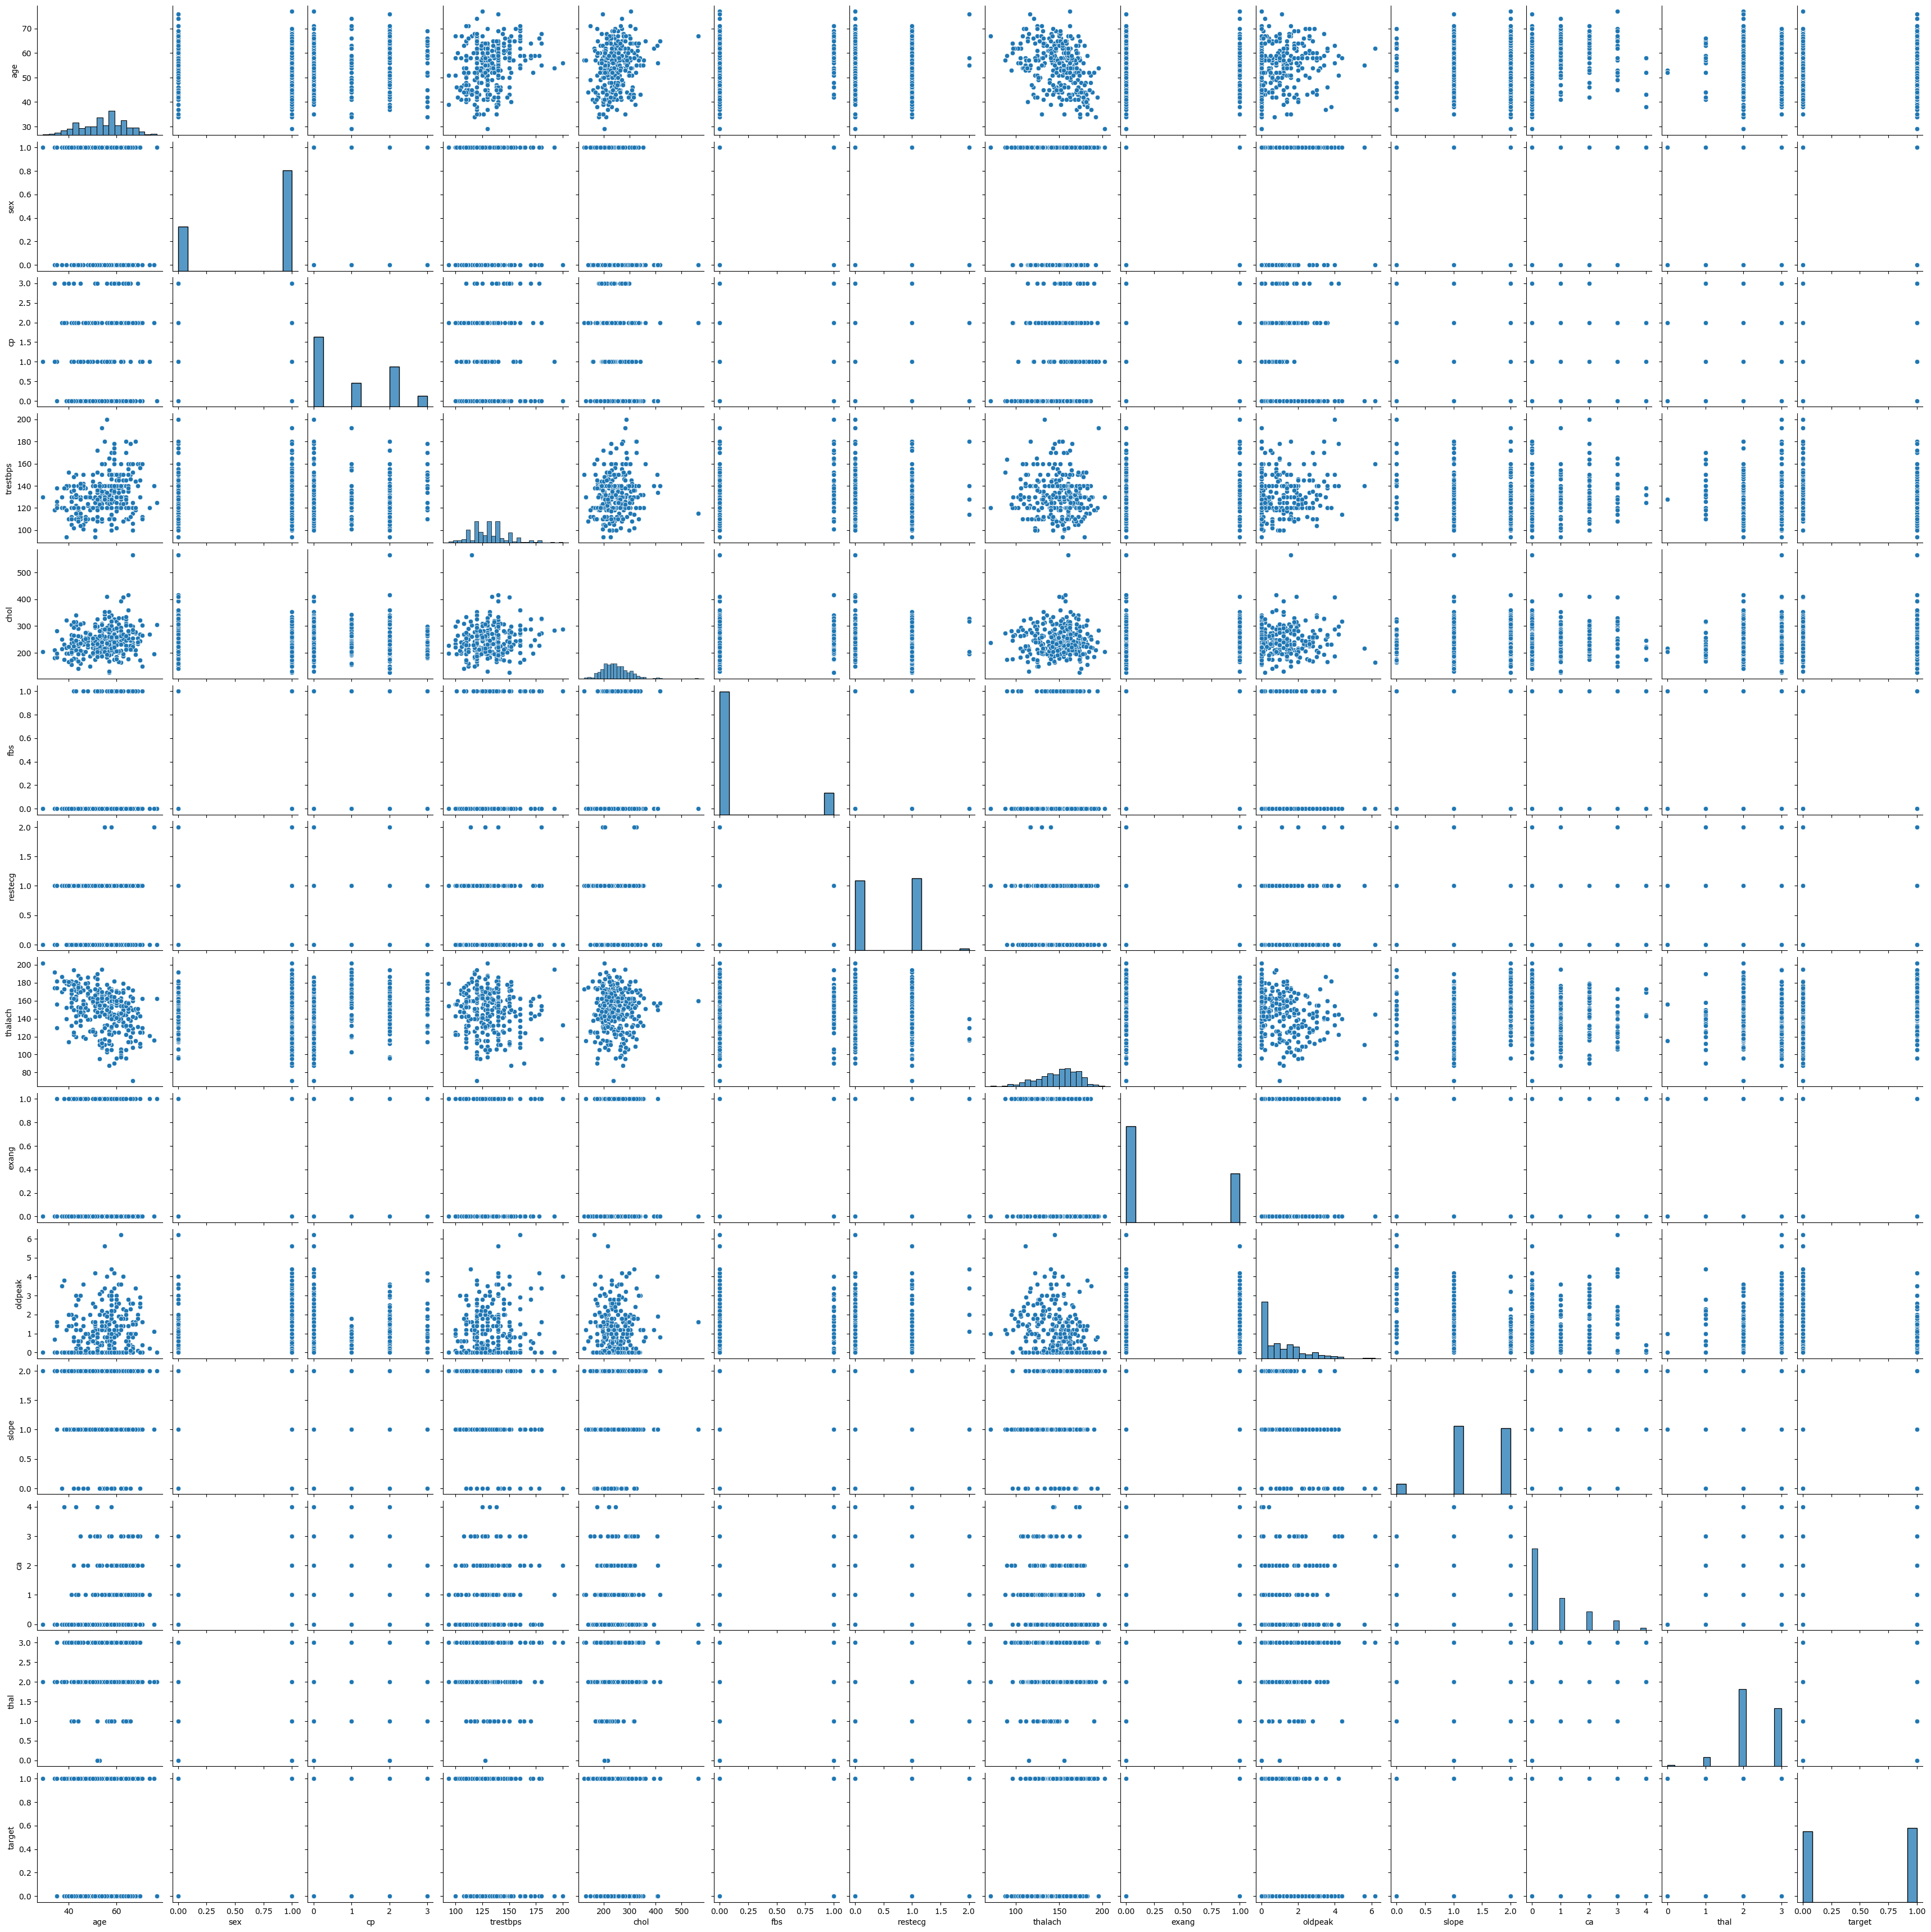

In [41]:
sns.pairplot(df)
plt.show()

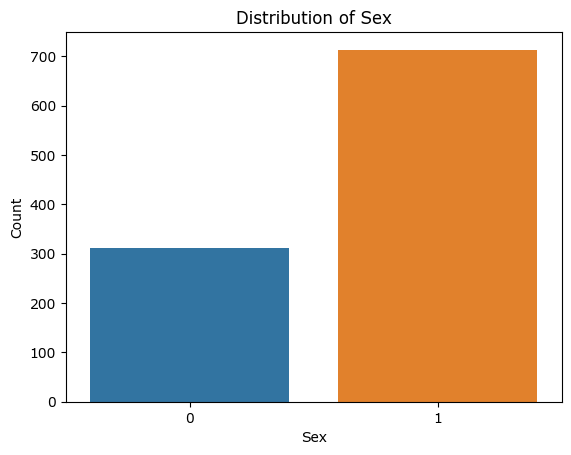

In [42]:
sns.countplot(x='sex', data=df)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


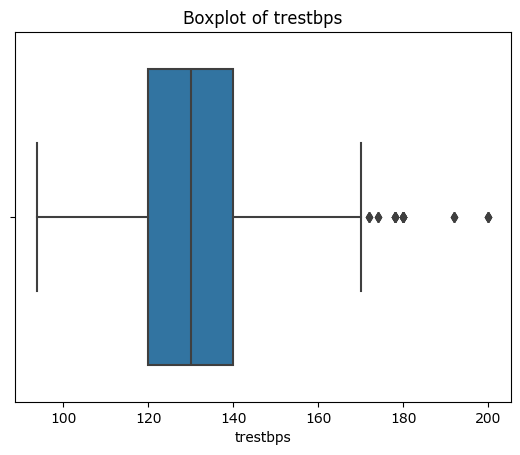

In [43]:
sns.boxplot(x='trestbps', data=df)
plt.title('Boxplot of trestbps')
plt.xlabel('trestbps')
plt.show()

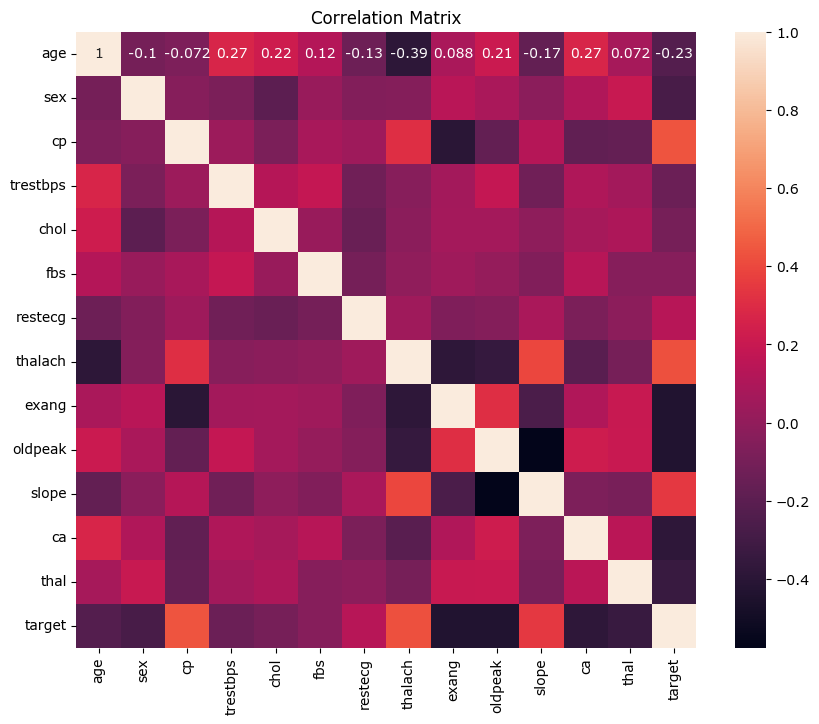

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [53]:
X = df.drop('target', axis=1)
y = df['target']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "K Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}


In [71]:
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

In [72]:
def results(y_test,y_pred):
    precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1 * 100:.2f}%")
    print(f"Accuracy: {accuracy * 100:.2f}%\n")

SVM :

[[62 40]
 [25 78]]


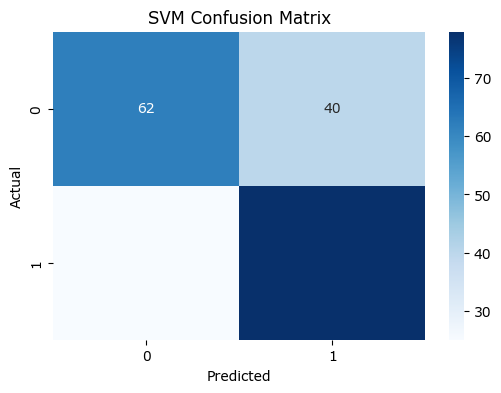

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       102
           1       0.66      0.76      0.71       103

    accuracy                           0.68       205
   macro avg       0.69      0.68      0.68       205
weighted avg       0.69      0.68      0.68       205


Precision: 68.67%
Recall: 68.29%
F1-Score: 68.11%
Accuracy: 68.29%

Decision Tree :

[[102   0]
 [  3 100]]


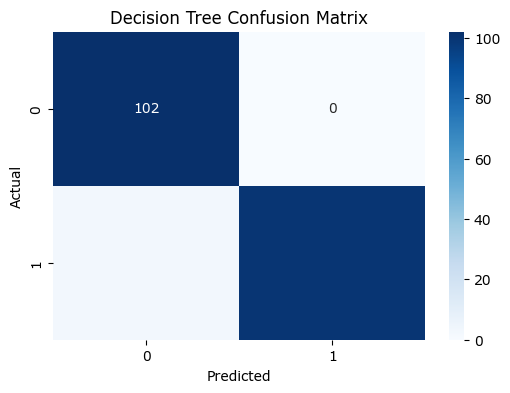

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Precision: 98.58%
Recall: 98.54%
F1-Score: 98.54%
Accuracy: 98.54%

K Neighbors :

[[74 28]
 [27 76]]


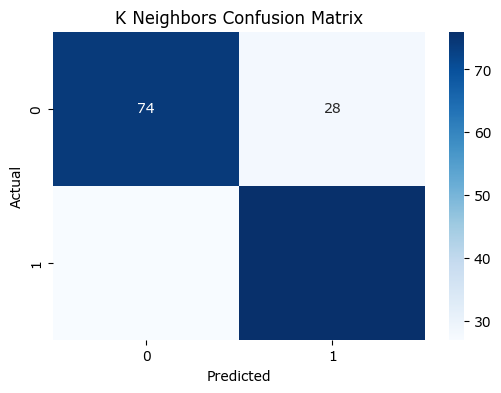

K Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205


Precision: 73.17%
Recall: 73.17%
F1-Score: 73.17%
Accuracy: 73.17%

Random Forest :

[[102   0]
 [  3 100]]


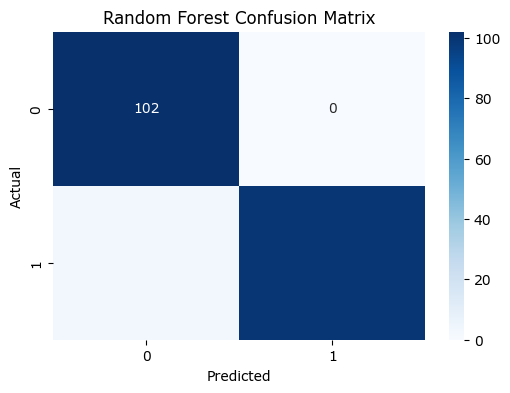

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Precision: 98.58%
Recall: 98.54%
F1-Score: 98.54%
Accuracy: 98.54%

Gradient Boosting :

[[93  9]
 [ 5 98]]


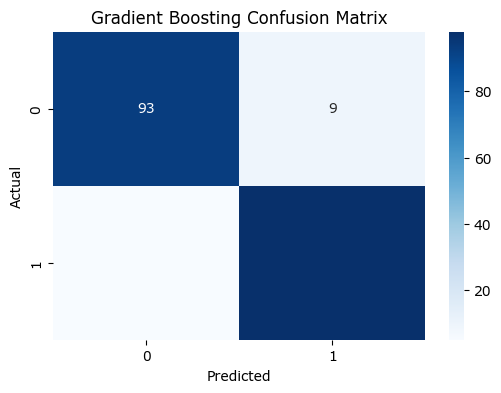

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       102
           1       0.92      0.95      0.93       103

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205


Precision: 93.24%
Recall: 93.17%
F1-Score: 93.17%
Accuracy: 93.17%

XGBoost :

[[102   0]
 [  3 100]]


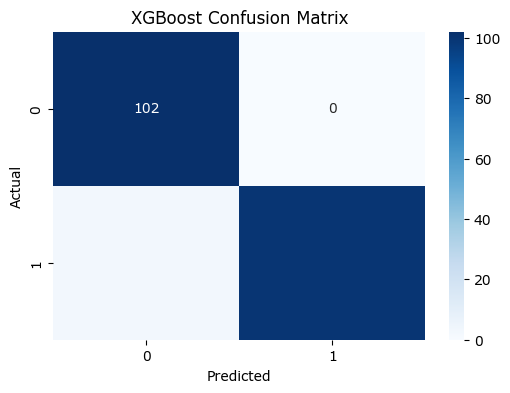

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Precision: 98.58%
Recall: 98.54%
F1-Score: 98.54%
Accuracy: 98.54%



In [73]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(model_name,":\n")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    report = classification_report(y_test, y_pred)
    print(f"{model_name} Classification Report:\n{report}\n")
    results(y_test,y_pred)

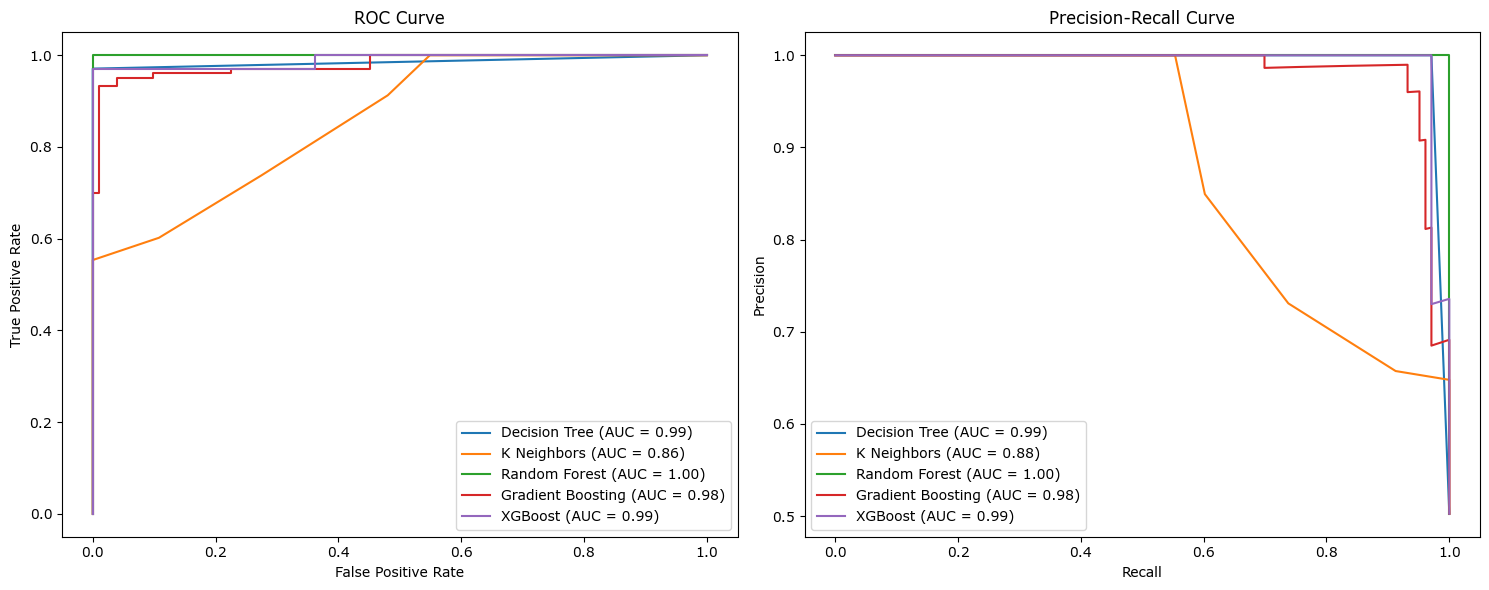

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
roc_aucs = []
pr_aucs = []
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[:, 1]  
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        roc_aucs.append(roc_auc)
        axs[0].plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        axs[0].set_xlabel('False Positive Rate')
        axs[0].set_ylabel('True Positive Rate')
        axs[0].set_title('ROC Curve')
        axs[0].legend()

        precision, recall, _ = precision_recall_curve(y_test, y_pred)
        pr_auc = auc(recall, precision)
        
        pr_aucs.append(pr_auc)
        axs[1].plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})')
        axs[1].set_xlabel('Recall')
        axs[1].set_ylabel('Precision')
        axs[1].set_title('Precision-Recall Curve')
        axs[1].legend()
        
plt.tight_layout()
plt.show()


In [128]:
metrics_data = {
    'Model': mod,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'Accuracy': accuracy_scores,
    'ROC AUC': roc_aucs,
    'PR AUC': pr_aucs
}

pd.DataFrame(metrics_data)

,Model,Precision,Recall,F1 Score,Accuracy,ROC AUC,PR AUC
0,SVM,0.686704,0.682927,0.681105,0.682927,0.000000,0.000000
1,Decision Tree,0.985784,0.985366,0.985364,0.985366,0.985437,0.992754
2,K Neighbors,0.731717,0.731707,0.731695,0.731707,0.860461,0.883981
3,Random Forest,0.985784,0.985366,0.985364,0.985366,1.000000,1.000000
4,Gradient Boosting,0.932353,0.931707,0.931675,0.931707,0.980678,0.984669
5,XGBoost,0.985784,0.985366,0.985364,0.985366,0.989435,0.992218


In [88]:
pastel_colors = ['#FFB6C1', '#98FB98', '#ADD8E6', '#FFD700']
mod = models.keys()

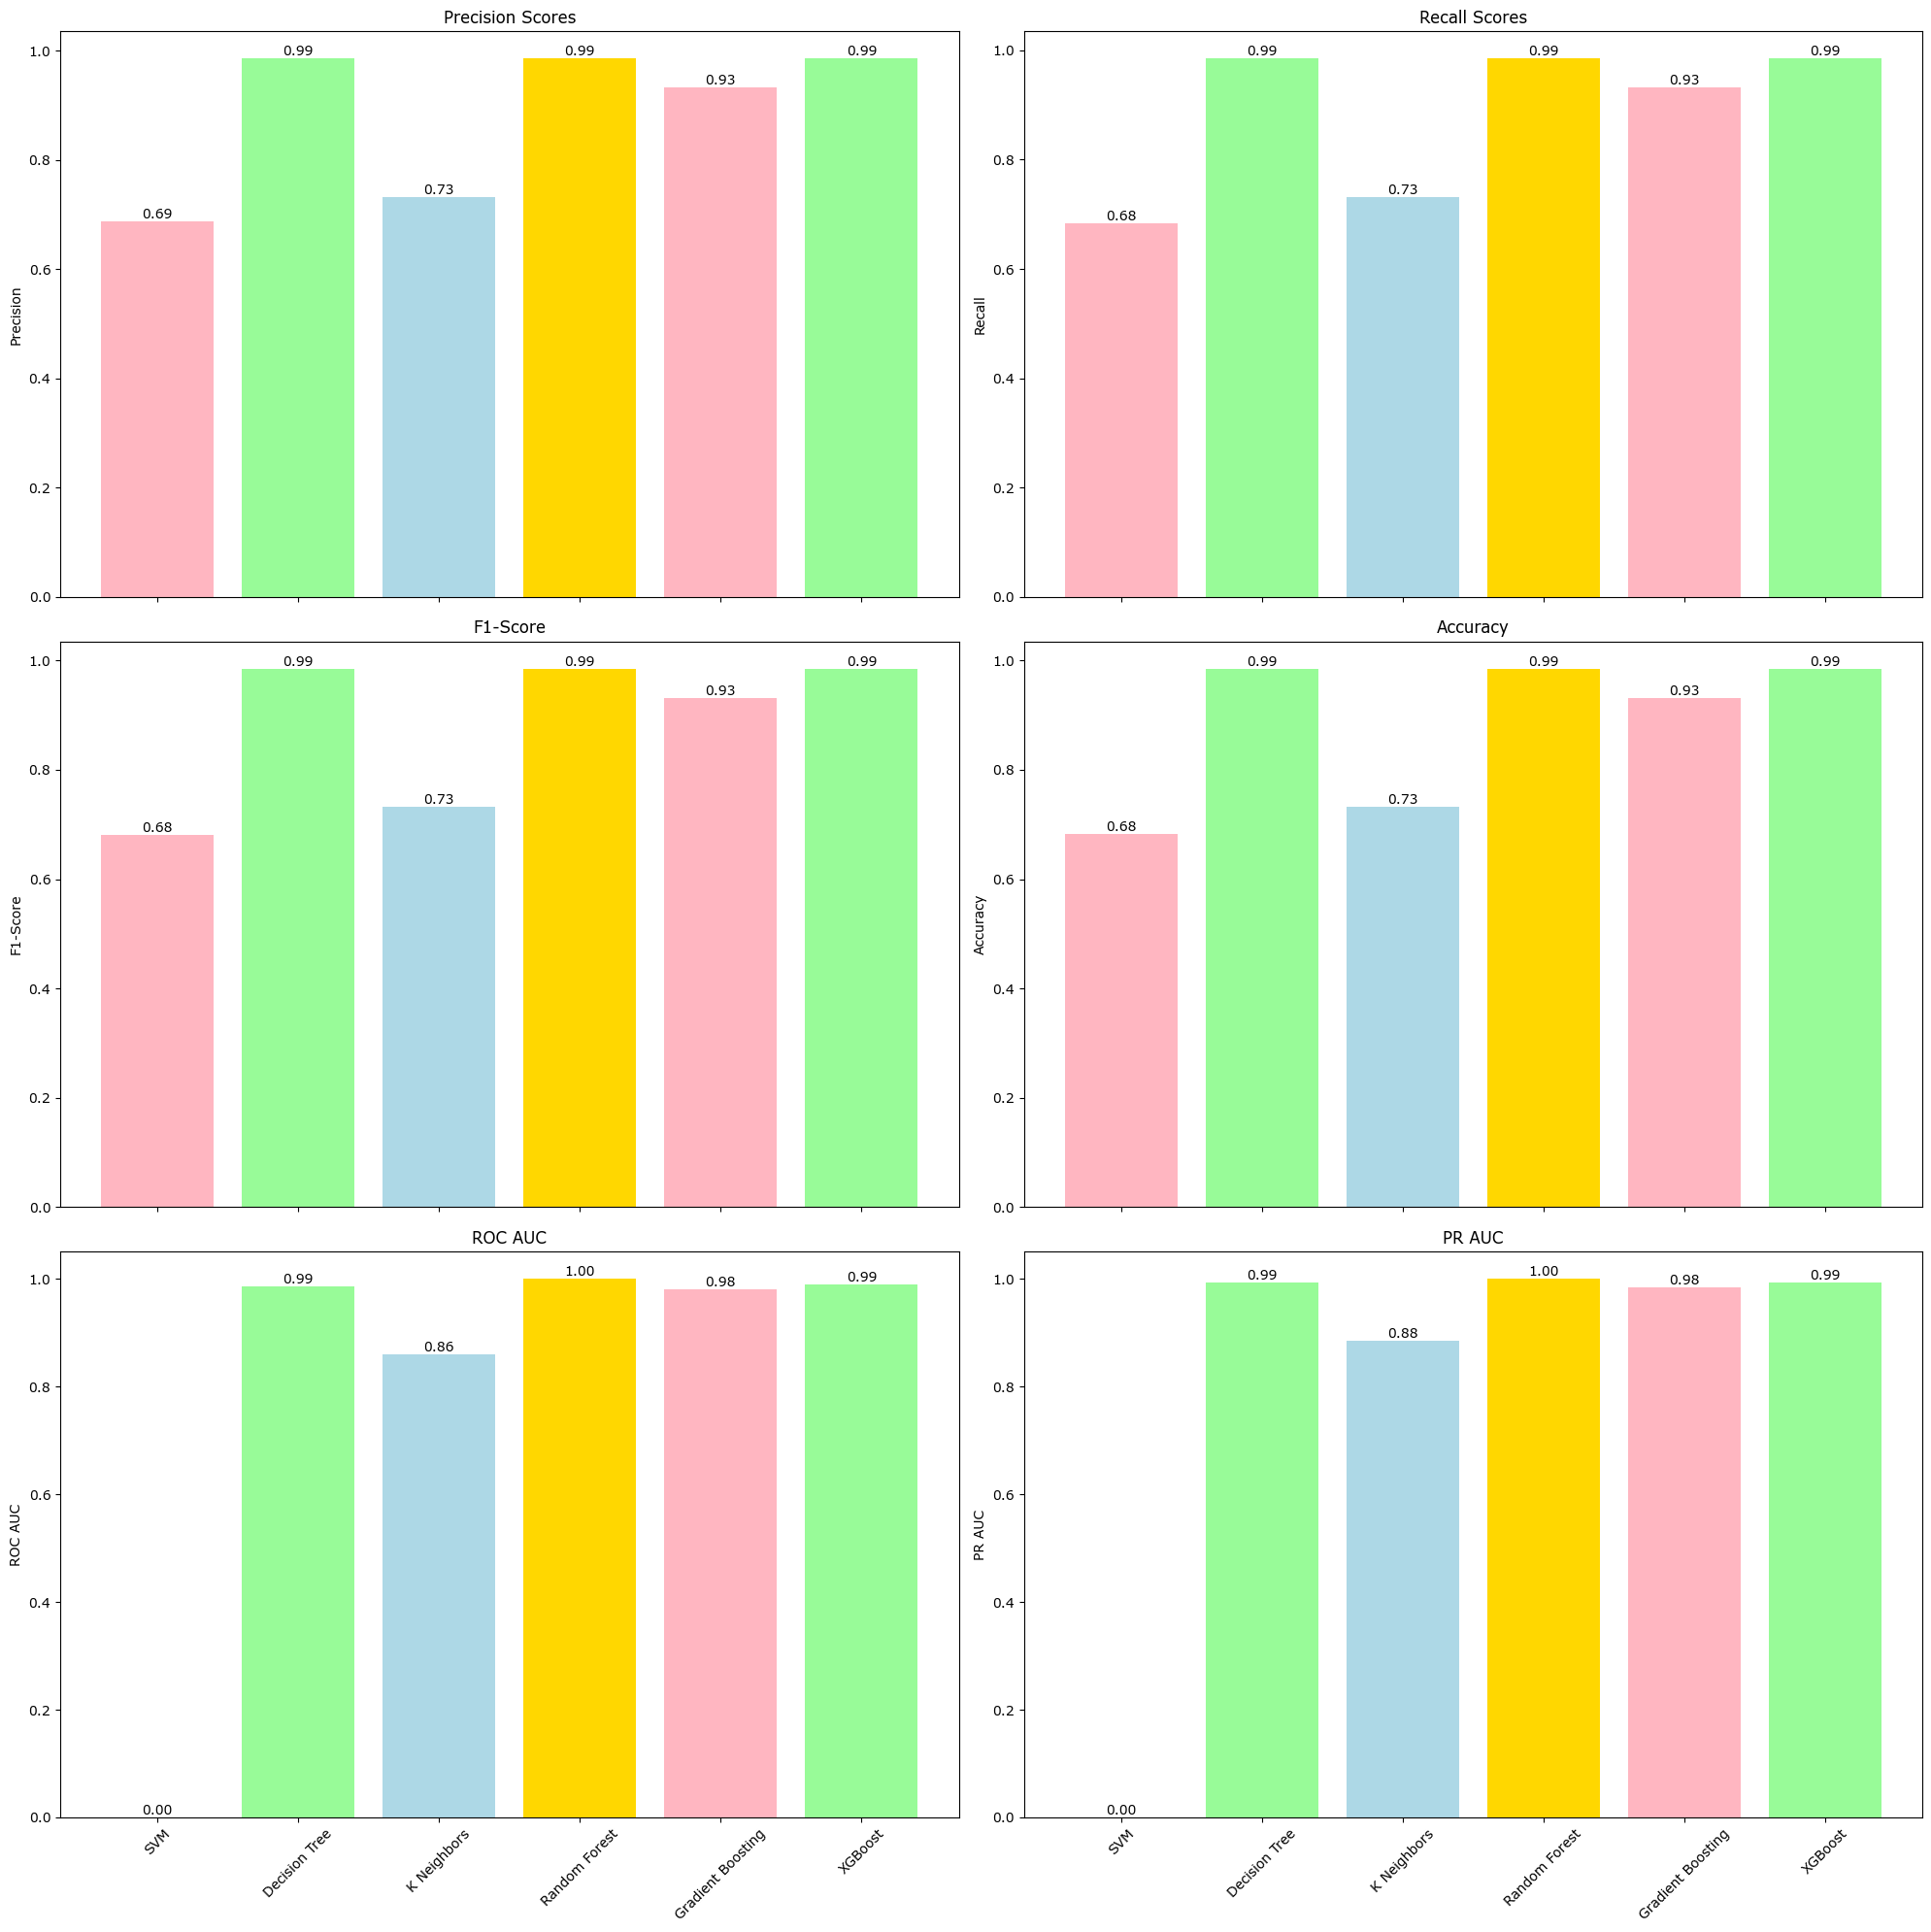

In [125]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20), sharex=True)

axs[0, 0].bar(mod, precision_scores, color=pastel_colors)
axs[0, 0].set_title('Precision Scores')
axs[0, 0].set_ylabel('Precision')

for i, v in enumerate(precision_scores):
    axs[0, 0].text(i, v + 0., f'{v:.2f}', ha='center', va='bottom')

axs[0, 1].bar(mod, recall_scores, color=pastel_colors)
axs[0, 1].set_title('Recall Scores')
axs[0, 1].set_ylabel('Recall')

for i, v in enumerate(recall_scores):
    axs[0, 1].text(i, v + 0., f'{v:.2f}', ha='center', va='bottom')

axs[1, 0].bar(mod, f1_scores, color=pastel_colors)
axs[1, 0].set_title('F1-Score')
axs[1, 0].set_ylabel('F1-Score')

for i, v in enumerate(f1_scores):
    axs[1, 0].text(i, v + 0., f'{v:.2f}', ha='center', va='bottom')


axs[1, 1].bar(mod, accuracy_scores, color=pastel_colors)
axs[1, 1].set_title('Accuracy')
axs[1, 1].set_ylabel('Accuracy')


for i, v in enumerate(accuracy_scores):
    axs[1, 1].text(i, v + 0., f'{v:.2f}', ha='center', va='bottom')

axs[2, 0].bar(mod, roc_aucs, color=pastel_colors)
axs[2, 0].set_title('ROC AUC')
axs[2, 0].set_ylabel('ROC AUC')


for i, v in enumerate(roc_aucs):
    axs[2, 0].text(i, v + 0., f'{v:.2f}', ha='center', va='bottom')

axs[2, 1].bar(mod, pr_aucs, color=pastel_colors)
axs[2, 1].set_title('PR AUC')
axs[2, 1].set_ylabel('PR AUC')


for i, v in enumerate(pr_aucs):
    axs[2, 1].text(i, v + 0., f'{v:.2f}', ha='center', va='bottom')


plt.subplots_adjust(wspace=0.5, hspace=0.5)


for ax in axs.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [130]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']